In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re

import os


# Specify the new directory path
new_directory = '/Users/levan/ATENEO MASTERAL/Thesis/Development/'

# Change the current working directory
os.chdir(new_directory)

# Hate Speech 5b-3 SVM

## Textual Characteristics

### Setup

In [2]:
ensemble_model_path = 'Results/ERROR ANALYSIS/HS/BLD/5BLD-3-SVM_predictions.csv'

# Load the ensemble model predictions into a DataFrame
ensemble_model = pd.read_csv(ensemble_model_path)

total_misclass = ensemble_model[ensemble_model['predicted_label'] != ensemble_model['true_label']]
total_correct = ensemble_model[ensemble_model['predicted_label'] == ensemble_model['true_label']]
total_correct.head()

,text,predicted_label,true_label
2,Binay ad is so effective. A kid thought he was...,1,1
3,"Ngawa pa Roxas, talo ka lang ni Binay eh! #Bin...",0,0
4,"naka wheelchair na mga ka kosa... gloria,janet...",0,0
5,"Binay-Chiz meeting, walang masama – Poe https:...",0,0
6,#OnlyBinayHatawSaCebu,0,0


### Word Count

In [3]:
# Calculate the number of words in each text in CORRECTLY CLASSIFIED
total_correct.loc[:, 'word_count'] = total_correct['text'].apply(lambda x: len(x.split()))

# Calculate the average word count
average_word_count = total_correct['word_count'].mean()

print(f"The average number of words per text in correctly classified instances: {average_word_count}")

The average number of words per text in correctly classified instances: 13.516129032258064


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/2870185984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_correct.loc[:, 'word_count'] = total_correct['text'].apply(lambda x: len(x.split()))


In [4]:
# Calculate the number of words in each text in MISCLASSIFIED 
total_misclass.loc[:, 'word_count'] = total_misclass['text'].apply(lambda x: len(x.split()))

# Calculate the average word count
average_word_count = total_misclass['word_count'].mean()

print(f"The average number of words per text in misclassified instances: {average_word_count}")

The average number of words per text in misclassified instances: 14.025069637883009


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/458128786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_misclass.loc[:, 'word_count'] = total_misclass['text'].apply(lambda x: len(x.split()))


### Uppercase

In [5]:
# CORRECTLY CLASSIFIED

# Define function to count uppercased characters
def count_capitalized_chars(text):
    return sum(1 for char in text if char.isupper())

# Apply function to 'text' column to get capitalized character counts
total_correct['capitalized_count'] = total_correct['text'].apply(count_capitalized_chars)

# Calculate the average of uppercased characters
average_capitalized_count = total_correct['capitalized_count'].mean()

# Print the result
print(f"Average uppercased character count FOR CORRECTLY CLASSIFIED INSTANCES: {average_capitalized_count}")

Average uppercased character count FOR CORRECTLY CLASSIFIED INSTANCES: 10.211693548387096


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/3450099657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_correct['capitalized_count'] = total_correct['text'].apply(count_capitalized_chars)


In [6]:
# MISCLASSIFIED

# Define function to count capitalized characters
def count_capitalized_chars(text):
    return sum(1 for char in text if char.isupper())

# Apply function to 'text' column to get capitalized character counts
total_misclass['capitalized_count'] = total_misclass['text'].apply(count_capitalized_chars)

# Calculate the average of capitalized characters
average_capitalized_count = total_misclass['capitalized_count'].mean()

# Print the result
print(f"Average capitalized character count FOR MISCLASSIFIED INSTANCES: {average_capitalized_count}")

Average capitalized character count FOR MISCLASSIFIED INSTANCES: 8.62674094707521


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/2913499192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_misclass['capitalized_count'] = total_misclass['text'].apply(count_capitalized_chars)


### Punctuation 

In [7]:
# CORRECTLY CLASSIFIED

# Define a function to count punctuation characters in a string
def count_punctuation_characters(text):
    # string.punctuation contains all standard punctuation marks
    return sum(1 for char in text if char in string.punctuation)

# Apply the function to the 'text' column to create a new column with the punctuation counts
total_correct['punctuation_count'] = total_correct['text'].apply(count_punctuation_characters)

# Calculate the average punctuation character count
average_punctuation_count = total_correct['punctuation_count'].mean()

# Output the result
print(f"Average Punctuation Characters Count IN CORRECTLY CLASSIFIED INSTANCES: {average_punctuation_count}")

Average Punctuation Characters Count IN CORRECTLY CLASSIFIED INSTANCES: 6.077956989247312


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/4241675347.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_correct['punctuation_count'] = total_correct['text'].apply(count_punctuation_characters)


In [8]:
# MISCLASSIFIED

# Define a function to count punctuation characters in a string
def count_punctuation_characters(text):
    # string.punctuation contains all standard punctuation marks
    return sum(1 for char in text if char in string.punctuation)

# Apply the function to the 'text' column to create a new column with the punctuation counts
total_misclass['punctuation_count'] = total_misclass['text'].apply(count_punctuation_characters)

# Calculate the average punctuation character count
average_punctuation_count = total_misclass['punctuation_count'].mean()

# Output the result
print(f"Average Punctuation Characters Count IN MISCLASSIFIED INSTANCES: {average_punctuation_count}")

Average Punctuation Characters Count IN MISCLASSIFIED INSTANCES: 5.573816155988858


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/1836169619.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_misclass['punctuation_count'] = total_misclass['text'].apply(count_punctuation_characters)


## Code Switching

### Setup

In [9]:
ensemble_model = pd.read_csv('Results/ERROR ANALYSIS/HS/BLD/5BLD-3-SVM_predictions.csv')

In [10]:
from langdetect import detect, detect_langs, DetectorFactory
import pandas as pd

# Set seed to make results deterministic
DetectorFactory.seed = 0

# Function to detect the primary language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply language detection to DataFrame
ensemble_model['detected_language'] = ensemble_model['text'].apply(detect_language)

# Display language counts
language_counts = ensemble_model['detected_language'].value_counts()
print(language_counts)


from langdetect import detect_langs

def detect_language_probs(text):
    try:
        langs = detect_langs(text)
        # Return a dictionary of languages and their probabilities
        lang_probs = {str(lang).split(':')[0]: float(str(lang).split(':')[1]) for lang in langs}
        return lang_probs
    except:
        return {}

# Apply function to DataFrame
ensemble_model['language_probs'] = ensemble_model['text'].apply(detect_language_probs)

print("Language Probabilities:")
print(ensemble_model[['text', 'language_probs']].head())

import fasttext
import nltk
nltk.download('punkt')

# Load the fastText model
model = fasttext.load_model('lid.176.ftz')

def token_language_detection(text):
    tokens = nltk.word_tokenize(text)
    lang_counts = {}
    for token in tokens:
        if token.isalpha():  # Ignore punctuation and numbers
            predictions = model.predict(token.lower())
            lang = predictions[0][0].replace('__label__', '')
            lang_counts[lang] = lang_counts.get(lang, 0) + 1
    return lang_counts

# Apply function to DataFrame
ensemble_model['token_lang_counts'] = ensemble_model['text'].apply(token_language_detection)

# Function to determine if text is code-switched
def is_code_switched(lang_counts):
    return len(lang_counts) > 1

ensemble_model['is_code_switched'] = ensemble_model['token_lang_counts'].apply(is_code_switched)

# Display code-switching counts
ensem_code_switching_counts = ensemble_model['is_code_switched'].value_counts()
print("\nCode-Switching Counts:")
print(ensem_code_switching_counts)

detected_language
tl         900
en         733
so          44
id          38
de          28
unknown     12
pt          12
es          10
fr           7
it           5
sw           5
nl           5
af           5
da           4
ro           4
lt           4
vi           4
sl           3
et           3
tr           3
ca           3
cy           3
sk           3
sv           3
pl           2
hr           2
lv           1
sq           1
Name: count, dtype: int64
Language Probabilities:
                                                text  \
0           @Bahagharey @CJason023 DIGONG over BINAY   
1  Poe fears 'repeat' of 2004 polls cheating #Hal...   
2  Binay ad is so effective. A kid thought he was...   
3  Ngawa pa Roxas, talo ka lang ni Binay eh! #Bin...   
4  naka wheelchair na mga ka kosa... gloria,janet...   

               language_probs  
0  {'en': 0.9999970195317455}  
1  {'en': 0.9999966021965432}  
2  {'en': 0.9999957772262976}  
3  {'tl': 0.9999953067164893}  
4  {'tl': 0.999

[nltk_data] Downloading package punkt to /Users/levan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Code-Switching Counts:
is_code_switched
True     1521
False     326
Name: count, dtype: int64


In [11]:
# Misclassified samples
misclassified_df = ensemble_model[ensemble_model['predicted_label'] != ensemble_model['true_label']]
correct_df = ensemble_model[ensemble_model['predicted_label'] == ensemble_model['true_label']]

print(f"\nNumber of misclassified samples: {len(misclassified_df)}")
print(f"Number of correctly classified samples: {len(correct_df)}")

# Code-switching in misclassified and correctly classified samples
misclassified_code_switching = misclassified_df['is_code_switched'].value_counts()
correct_code_switching = correct_df['is_code_switched'].value_counts()

print("\nCode-Switching in Misclassified Samples:")
print(misclassified_code_switching)
print("\nCode-Switching in Correctly Classified Samples:")
print(correct_code_switching)


Number of misclassified samples: 359
Number of correctly classified samples: 1488

Code-Switching in Misclassified Samples:
is_code_switched
True     298
False     61
Name: count, dtype: int64

Code-Switching in Correctly Classified Samples:
is_code_switched
True     1223
False     265
Name: count, dtype: int64


In [12]:
import pandas as pd

# Create a column indicating whether the prediction was correct
ensemble_model['ensemble_correct'] = ensemble_model['predicted_label'] == ensemble_model['true_label']

# Verify the new column
print(ensemble_model[['predicted_label', 'true_label', 'ensemble_correct']].head())

   predicted_label  true_label  ensemble_correct
0                1           0             False
1                0           1             False
2                1           1              True
3                0           0              True
4                0           0              True


### Chi Squared Test

In [13]:
import pandas as pd

# Create the contingency table
contingency_table = pd.crosstab(ensemble_model['ensemble_correct'], ensemble_model['is_code_switched'])

# Rename the index and columns for clarity only
contingency_table.index = ['Correctly Classified', 'Misclassified']
contingency_table.columns = ['Single Language', 'Code-Switched']

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
                      Single Language  Code-Switched
Correctly Classified               61            298
Misclassified                     265           1223


In [14]:
from scipy.stats import chi2_contingency

# Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-Squared Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nConclusion: There is a significant association between misclassification and code-switching.")
else:
    print("\nConclusion: There is no significant association between misclassification and code-switching.")


Chi-Squared Statistic: 0.0827
Degrees of Freedom: 1
P-Value: 0.7737

Conclusion: There is no significant association between misclassification and code-switching.


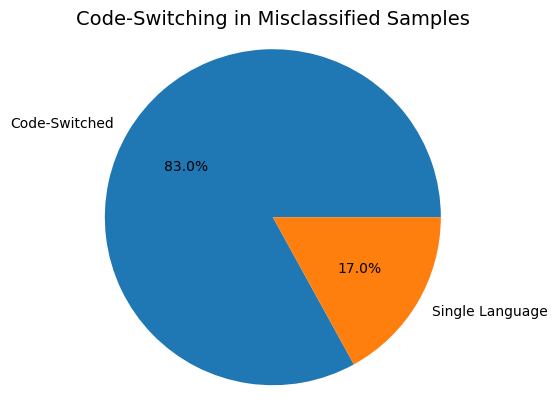

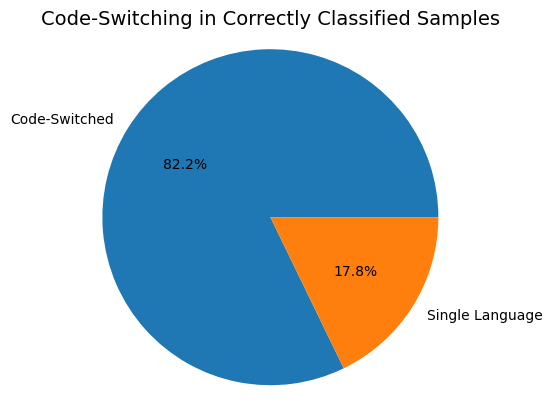

In [15]:
import matplotlib.pyplot as plt

# Function to plot code-switching distribution with percentage labels
def plot_code_switching_distribution(df, title):
    # Calculate the percentage of each category
    counts = df['is_code_switched'].value_counts(normalize=True) * 100
    # Rename the index for better readability in the chart
    counts = counts.rename({True: 'Code-Switched', False: 'Single Language'})
    
    # Create the pie chart
    counts.plot(
        kind='pie',
        autopct='%1.1f%%',        # Display percentages with one decimal place
    )
    
    
    plt.title(title, fontsize=14)
    plt.ylabel('') 
    
    plt.axis('equal')
    
    # Display the chart
    plt.show()

# Plotting
plot_code_switching_distribution(misclassified_df, 'Code-Switching in Misclassified Samples')
plot_code_switching_distribution(correct_df, 'Code-Switching in Correctly Classified Samples')

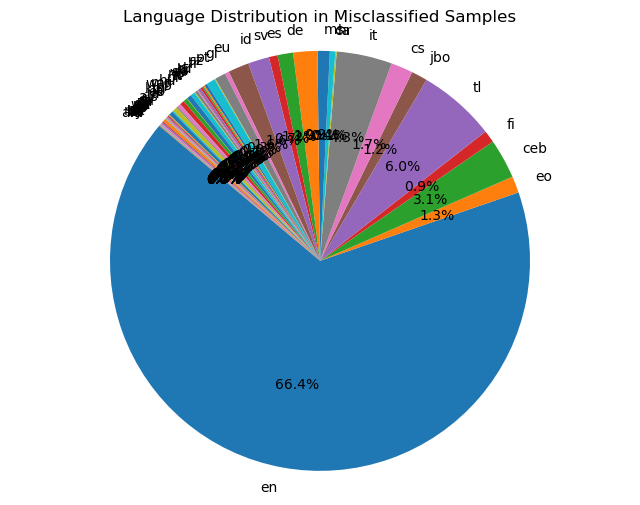

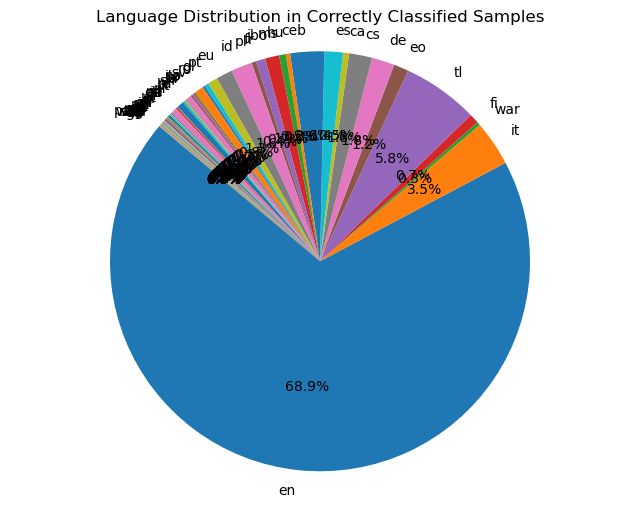

In [16]:
# Aggregate language counts in misclassified samples
def aggregate_language_counts(df):
    lang_counts = {}
    for counts in df['token_lang_counts']:
        for lang, count in counts.items():
            lang_counts[lang] = lang_counts.get(lang, 0) + count
    return lang_counts

misclassified_lang_counts = aggregate_language_counts(misclassified_df)
correct_lang_counts = aggregate_language_counts(correct_df)

# Function to plot language distribution
def plot_language_distribution(lang_counts, title):
    languages = list(lang_counts.keys())
    counts = list(lang_counts.values())
    plt.figure(figsize=(8,6))
    plt.pie(counts, labels=languages, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Plotting
plot_language_distribution(misclassified_lang_counts, 'Language Distribution in Misclassified Samples')
plot_language_distribution(correct_lang_counts, 'Language Distribution in Correctly Classified Samples')

## English Proportion

### Setup

In [17]:
import pandas as pd
import fasttext
import nltk
from nltk.tokenize import word_tokenize
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')

ensemble_model_path = 'Results/ERROR ANALYSIS/HS/BLD/5BLD-3-SVM_predictions.csv'

# Load the ensemble model predictions into a DataFrame
ensemble_model = pd.read_csv(ensemble_model_path)

print("Ensemble Model DataFrame Loaded:")
print(ensemble_model.head())
ensemble_model.count()

Ensemble Model DataFrame Loaded:
                                                text  predicted_label  \
0           @Bahagharey @CJason023 DIGONG over BINAY                1   
1  Poe fears 'repeat' of 2004 polls cheating #Hal...                0   
2  Binay ad is so effective. A kid thought he was...                1   
3  Ngawa pa Roxas, talo ka lang ni Binay eh! #Bin...                0   
4  naka wheelchair na mga ka kosa... gloria,janet...                0   

   true_label  
0           0  
1           1  
2           1  
3           0  
4           0  


[nltk_data] Downloading package punkt to /Users/levan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text               1847
predicted_label    1847
true_label         1847
dtype: int64

### Identify misclassification

In [18]:
# Create column indicating whether the prediction was correct
ensemble_model['ensemble_correct'] = ensemble_model['predicted_label'] == ensemble_model['true_label']

print("\nDataFrame with 'ensemble_correct' Column:")
print(ensemble_model[['predicted_label', 'true_label', 'ensemble_correct']].head())

ensemble_model.count()


DataFrame with 'ensemble_correct' Column:
   predicted_label  true_label  ensemble_correct
0                1           0             False
1                0           1             False
2                1           1              True
3                0           0              True
4                0           0              True


text                1847
predicted_label     1847
true_label          1847
ensemble_correct    1847
dtype: int64

### Load and use FastText Language Model

In [19]:
# Load path to the FastText language identification model
fasttext_model_path = 'lid.176.ftz'

# Load FastText model
try:
    model = fasttext.load_model(fasttext_model_path)
    print("\nFastText Language Identification Model Loaded Successfully.")
except Exception as e:
    print(f"\nError Loading FastText Model: {e}")
    exit()

# Function for token-level language detection
def token_language_detection(text):
    """
    Detects the language of each token in the text using FastText.

    Parameters:
        text (str): The input text.

    Returns:
        dict: A dictionary with language codes as keys and token counts as values.
    """
    tokens = word_tokenize(text)
    lang_counts = {}
    for token in tokens:
        if token.isalpha():  # Ignore punctuation and numbers
            predictions = model.predict(token.lower())
            lang = predictions[0][0].replace('__label__', '')
            lang_counts[lang] = lang_counts.get(lang, 0) + 1
    return lang_counts

# Function to calculate the proportion of English tokens
def calculate_english_proportion(lang_counts):
    """
    Calculates the percentage of English tokens in the text.

    Parameters:
        lang_counts (dict): A dictionary with language codes and their token counts.

    Returns:
        float: Percentage of English tokens.
    """
    total_tokens = sum(lang_counts.values())
    if total_tokens == 0:
        return 0.0
    english_tokens = lang_counts.get('en', 0)
    return (english_tokens / total_tokens) * 100  # Percentage of English tokens



# Apply Language Detection and Calculate English Proportion
# Apply token-level language detection
ensemble_model['token_lang_counts'] = ensemble_model['text'].apply(token_language_detection)

# Calculate the proportion of English tokens
ensemble_model['english_proportion'] = ensemble_model['token_lang_counts'].apply(calculate_english_proportion)

# Display statistics of English proportion
print("\nEnglish Proportion Statistics:")
print(ensemble_model['english_proportion'].describe())

ensemble_model.count()


FastText Language Identification Model Loaded Successfully.

English Proportion Statistics:
count    1847.000000
mean       67.959221
std        25.407109
min         0.000000
25%        50.000000
50%        70.588235
75%        90.692641
max       100.000000
Name: english_proportion, dtype: float64


text                  1847
predicted_label       1847
true_label            1847
ensemble_correct      1847
token_lang_counts     1847
english_proportion    1847
dtype: int64

### Categorize Texts Based on English Proportion

In [20]:
# Calculate the median English proportion
median_english = ensemble_model['english_proportion'].median()
print(f"\nMedian English Proportion: {median_english:.2f}%")

# Categorize texts into 'High English' and 'Low English' based on median
ensemble_model['english_category'] = ensemble_model['english_proportion'].apply(
    lambda x: 'High English' if x > median_english else 'Low English'
)

# Verify the categorization
print("\nCategorization Based on English Proportion:")
print(ensemble_model[['english_proportion', 'english_category']].head())

ensemble_model.count()


Median English Proportion: 70.59%

Categorization Based on English Proportion:
   english_proportion english_category
0          100.000000     High English
1          100.000000     High English
2           93.333333     High English
3           50.000000      Low English
4           70.588235      Low English


text                  1847
predicted_label       1847
true_label            1847
ensemble_correct      1847
token_lang_counts     1847
english_proportion    1847
english_category      1847
dtype: int64

### Create Contingency Table

In [21]:
contingency_table = pd.crosstab(ensemble_model['english_category'], ensemble_model['ensemble_correct'])

# Rename the columns for clarity
contingency_table.columns = ['Misclassified', 'Correctly Classified']

# Ensure the index name is 'english_category' for proper melt operation
contingency_table.index.name = 'english_category'

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

ensemble_model.count()


Contingency Table:
                  Misclassified  Correctly Classified
english_category                                     
High English                158                   762
Low English                 201                   726


text                  1847
predicted_label       1847
true_label            1847
ensemble_correct      1847
token_lang_counts     1847
english_proportion    1847
english_category      1847
dtype: int64

### Perform Chi-Squared Test

In [22]:
# Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-Squared Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nConclusion: There is a significant association between English content and misclassification rates.")
else:
    print("\nConclusion: There is no significant association between English content and misclassification rates.")



#Check Chi-Squared Test Assumptions
# Display expected frequencies
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("\nExpected Frequencies:")
print(expected_df)

# Check if any expected frequency is less than 5
if (expected < 5).any():
    print("\nSome expected frequencies are less than 5. Performing Fisher's Exact Test.")
    # Ensure the contingency table is 2x2
    if contingency_table.shape == (2, 2):
        odds_ratio, p_value = fisher_exact(contingency_table)
        print(f"Fisher's Exact Test Odds Ratio: {odds_ratio:.4f}")
        print(f"Fisher's Exact Test P-Value: {p_value:.4f}")
        
        # Interpret the results
        if p_value < alpha:
            print("Conclusion: Significant association between English content and misclassification rates.")
        else:
            print("Conclusion: No significant association between English content and misclassification rates.")
    else:
        print("\nFisher's Exact Test is not suitable for tables larger than 2x2.")
else:
    print("\nAll expected frequencies are above 5. Chi-Squared Test assumptions are met.")




#Summary of Findings
if p < alpha:
    print("\nSummary: Texts with a lower proportion of English content are significantly more likely to be misclassified by the ensemble model.")

else:
    print("\nSummary: There is no significant relationship between the proportion of English content in texts and misclassification rates by the ensemble model.")


Chi-Squared Statistic: 5.7105
Degrees of Freedom: 1
P-Value: 0.0169

Conclusion: There is a significant association between English content and misclassification rates.

Expected Frequencies:
                  Misclassified  Correctly Classified
english_category                                     
High English         178.819708            741.180292
Low English          180.180292            746.819708

All expected frequencies are above 5. Chi-Squared Test assumptions are met.

Summary: Texts with a lower proportion of English content are significantly more likely to be misclassified by the ensemble model.


# FiReCS 5b-3 SVM

## Textual Characteristics

### Setup

In [23]:
ensemble_model_path = 'Results/ERROR ANALYSIS/FIRE/BLD/5BLD-3-SVM_predictions.csv'

# Load the ensemble model predictions into a DataFrame
ensemble_model = pd.read_csv(ensemble_model_path)

total_misclass = ensemble_model[ensemble_model['predicted_label'] != ensemble_model['true_label']]
total_correct = ensemble_model[ensemble_model['predicted_label'] == ensemble_model['true_label']]
total_correct.head()

,text,predicted_label,true_label
0,maganda slippers kaso yung isa maliit yung bin...,1,1
1,oily sobrang tapang and then hindi sya kaamoy ...,0,0
2,the packing was ok na sana pero may gas2 yung ...,1,1
3,mganda ung mittens at shoes kaso ung cap ang p...,1,1
5,5 10 ang mahal ng payong nd nmn ganun ka quali...,0,0


### Word Count

In [24]:
# Calculate the number of words in each text in CORRECTLY CLASSIFIED
total_correct.loc[:, 'word_count'] = total_correct['text'].apply(lambda x: len(x.split()))

# Calculate the average word count
average_word_count = total_correct['word_count'].mean()

print(f"The average number of words per text in correctly classified instances: {average_word_count}")

The average number of words per text in correctly classified instances: 26.538372093023256


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/2870185984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_correct.loc[:, 'word_count'] = total_correct['text'].apply(lambda x: len(x.split()))


In [25]:
# Calculate the number of words in each text in MISCLASSIFIED 
total_misclass.loc[:, 'word_count'] = total_misclass['text'].apply(lambda x: len(x.split()))

# Calculate the average word count
average_word_count = total_misclass['word_count'].mean()

print(f"The average number of words per text in misclassified instances: {average_word_count}")

The average number of words per text in misclassified instances: 28.21693121693122


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/458128786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_misclass.loc[:, 'word_count'] = total_misclass['text'].apply(lambda x: len(x.split()))


### Interjections

In [26]:
import pandas as pd
import numpy as np
import re
from scipy.stats import chi2_contingency

# Define target words
target_words = ['pa', 'na', 'naman']

# Function to check presence of target words
def contains_target_words(text, words):
    """
    Checks if any of the target words are present in the given text.
    
    Parameters:
    - text (str): The text to search within.
    - words (list): List of target words.
    
    Returns:
    - bool: True if any target word is found, False otherwise.
    """
    pattern = r'\b(' + '|'.join(words) + r')\b'
    return bool(re.search(pattern, text, flags=re.IGNORECASE))

# Apply the function to both dataframes
total_misclass['contains_target_word'] = total_misclass['text'].apply(lambda x: contains_target_words(x, target_words))
total_correct['contains_target_word'] = total_correct['text'].apply(lambda x: contains_target_words(x, target_words))

# Aggregate presence of any target word
contingency_table = pd.DataFrame({
    'Contains_Target_Word': ['Yes', 'No'],
    'Misclassified': [
        total_misclass['contains_target_word'].sum(),
        total_misclass.shape[0] - total_misclass['contains_target_word'].sum()
    ],
    'Correctly_Classified': [
        total_correct['contains_target_word'].sum(),
        total_correct.shape[0] - total_correct['contains_target_word'].sum()
    ]
})

# Set 'Contains_Target_Word' as the index
contingency_table = contingency_table.set_index('Contains_Target_Word')

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display Chi-Square Test Results
print(f"\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Result: There is a significant association between the presence of target words and misclassifications.")
else:
    print("Result: There is no significant association between the presence of target words and misclassifications.")


Contingency Table:
                      Misclassified  Correctly_Classified
Contains_Target_Word                                     
Yes                             123                   525
No                               66                   335

Chi-Square Test Results:
Chi2 Statistic: 0.9032
Degrees of Freedom: 1
P-Value: 0.3419
Result: There is no significant association between the presence of target words and misclassifications.


/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/218705757.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_misclass['contains_target_word'] = total_misclass['text'].apply(lambda x: contains_target_words(x, target_words))
/var/folders/d8/nbkwtx_953q99tk0ckh0v0v40000gn/T/ipykernel_67331/218705757.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_correct['contains_target_word'] = total_correct['text'].apply(lambda x: contains_target_words(x, target_words))


## English Proportion

### Setup

In [27]:
import pandas as pd
import fasttext
import nltk
from nltk.tokenize import word_tokenize
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')

ensemble_model_path = 'Results/ERROR ANALYSIS/FIRE/BLD/5BLD-3-SVM_predictions.csv'

# Load the ensemble model predictions into a DataFrame
ensemble_model = pd.read_csv(ensemble_model_path)

print("Ensemble Model DataFrame Loaded:")
print(ensemble_model.head())
ensemble_model.count()

Ensemble Model DataFrame Loaded:
                                                text  predicted_label  \
0  maganda slippers kaso yung isa maliit yung bin...                1   
1  oily sobrang tapang and then hindi sya kaamoy ...                0   
2  the packing was ok na sana pero may gas2 yung ...                1   
3  mganda ung mittens at shoes kaso ung cap ang p...                1   
4  quality is good sana nagtanong muna kayo kung ...                1   

   true_label  
0           1  
1           0  
2           1  
3           1  
4           0  


[nltk_data] Downloading package punkt to /Users/levan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text               1049
predicted_label    1049
true_label         1049
dtype: int64

### Identify misclassification

In [28]:
# Create column indicating whether the prediction was correct
ensemble_model['ensemble_correct'] = ensemble_model['predicted_label'] == ensemble_model['true_label']

print("\nDataFrame with 'ensemble_correct' Column:")
print(ensemble_model[['predicted_label', 'true_label', 'ensemble_correct']].head())

ensemble_model.count()


DataFrame with 'ensemble_correct' Column:
   predicted_label  true_label  ensemble_correct
0                1           1              True
1                0           0              True
2                1           1              True
3                1           1              True
4                1           0             False


text                1049
predicted_label     1049
true_label          1049
ensemble_correct    1049
dtype: int64

### Load and use FastText Language Model

In [29]:
# Load path to the FastText language identification model
fasttext_model_path = 'lid.176.ftz'

# Load FastText model
try:
    model = fasttext.load_model(fasttext_model_path)
    print("\nFastText Language Identification Model Loaded Successfully.")
except Exception as e:
    print(f"\nError Loading FastText Model: {e}")
    exit()

# Function for token-level language detection
def token_language_detection(text):
    """
    Detects the language of each token in the text using FastText.

    Parameters:
        text (str): The input text.

    Returns:
        dict: A dictionary with language codes as keys and token counts as values.
    """
    tokens = word_tokenize(text)
    lang_counts = {}
    for token in tokens:
        if token.isalpha():  # Ignore punctuation and numbers
            predictions = model.predict(token.lower())
            lang = predictions[0][0].replace('__label__', '')
            lang_counts[lang] = lang_counts.get(lang, 0) + 1
    return lang_counts

# Function to calculate the proportion of English tokens
def calculate_english_proportion(lang_counts):
    """
    Calculates the percentage of English tokens in the text.

    Parameters:
        lang_counts (dict): A dictionary with language codes and their token counts.

    Returns:
        float: Percentage of English tokens.
    """
    total_tokens = sum(lang_counts.values())
    if total_tokens == 0:
        return 0.0
    english_tokens = lang_counts.get('en', 0)
    return (english_tokens / total_tokens) * 100  # Percentage of English tokens



# Apply Language Detection and Calculate English Proportion
# Apply token-level language detection
ensemble_model['token_lang_counts'] = ensemble_model['text'].apply(token_language_detection)

# Calculate the proportion of English tokens
ensemble_model['english_proportion'] = ensemble_model['token_lang_counts'].apply(calculate_english_proportion)

# Display statistics of English proportion
print("\nEnglish Proportion Statistics:")
print(ensemble_model['english_proportion'].describe())

ensemble_model.count()


FastText Language Identification Model Loaded Successfully.

English Proportion Statistics:
count    1049.000000
mean       62.051684
std        14.837030
min        16.666667
25%        50.000000
50%        61.538462
75%        72.000000
max       100.000000
Name: english_proportion, dtype: float64


text                  1049
predicted_label       1049
true_label            1049
ensemble_correct      1049
token_lang_counts     1049
english_proportion    1049
dtype: int64

### Categorize Texts Based on English Proportion

In [30]:
# Calculate the median English proportion
median_english = ensemble_model['english_proportion'].median()
print(f"\nMedian English Proportion: {median_english:.2f}%")

# Categorize texts into 'High English' and 'Low English' based on median
ensemble_model['english_category'] = ensemble_model['english_proportion'].apply(
    lambda x: 'High English' if x > median_english else 'Low English'
)

# Verify the categorization
print("\nCategorization Based on English Proportion:")
print(ensemble_model[['english_proportion', 'english_category']].head())

ensemble_model.count()


Median English Proportion: 61.54%

Categorization Based on English Proportion:
   english_proportion english_category
0           48.717949      Low English
1           48.484848      Low English
2           63.636364     High English
3           44.827586      Low English
4           35.714286      Low English


text                  1049
predicted_label       1049
true_label            1049
ensemble_correct      1049
token_lang_counts     1049
english_proportion    1049
english_category      1049
dtype: int64

### Create Contingency Table

In [31]:
contingency_table = pd.crosstab(ensemble_model['english_category'], ensemble_model['ensemble_correct'])

# Rename columns
contingency_table.columns = ['Misclassified', 'Correctly Classified']

contingency_table.index.name = 'english_category'

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

ensemble_model.count()


Contingency Table:
                  Misclassified  Correctly Classified
english_category                                     
High English                 82                   432
Low English                 107                   428


text                  1049
predicted_label       1049
true_label            1049
ensemble_correct      1049
token_lang_counts     1049
english_proportion    1049
english_category      1049
dtype: int64

### Perform Chi-Squared Test high english vs low english

In [32]:
# Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-Squared Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")


alpha = 0.05
if p < alpha:
    print("\nConclusion: There is a significant association between English content and misclassification rates.")
else:
    print("\nConclusion: There is no significant association between English content and misclassification rates.")



#Check Chi-Squared Test Assumptions
# Display expected frequencies
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("\nExpected Frequencies:")
print(expected_df)

# Check if any expected frequency is less than 5
if (expected < 5).any():
    print("\nSome expected frequencies are less than 5. Performing Fisher's Exact Test.")
    # Ensure the contingency table is 2x2
    if contingency_table.shape == (2, 2):
        odds_ratio, p_value = fisher_exact(contingency_table)
        print(f"Fisher's Exact Test Odds Ratio: {odds_ratio:.4f}")
        print(f"Fisher's Exact Test P-Value: {p_value:.4f}")
        
        # Interpret the results
        if p_value < alpha:
            print("Conclusion: Significant association between English content and misclassification rates.")
        else:
            print("Conclusion: No significant association between English content and misclassification rates.")
    else:
        print("\nFisher's Exact Test is not suitable for tables larger than 2x2.")
else:
    print("\nAll expected frequencies are above 5. Chi-Squared Test assumptions are met.")




#Summary of Findings
if p < alpha:
    print("\nSummary: Texts with a lower proportion of English content are significantly more likely to be misclassified by the ensemble model.")

else:
    print("\nSummary: There is no significant relationship between the proportion of English content in texts and misclassification rates by the ensemble model.")


Chi-Squared Statistic: 2.6387
Degrees of Freedom: 1
P-Value: 0.1043

Conclusion: There is no significant association between English content and misclassification rates.

Expected Frequencies:
                  Misclassified  Correctly Classified
english_category                                     
High English          92.608198            421.391802
Low English           96.391802            438.608198

All expected frequencies are above 5. Chi-Squared Test assumptions are met.

Summary: There is no significant relationship between the proportion of English content in texts and misclassification rates by the ensemble model.


# TEST OF SIGNIFICANCE

## Hate Speech Model

### Voting

In [33]:
from scipy.stats import ttest_rel

#F1 scores for HV and SV
hv_scores = [79.57, 78.17, 79.58, 78.98, 78.61, 78.7, 79.17, 78.88, 79.05]
sv_scores = [79.6, 79.6, 79.91, 78.82, 78.97, 79.19, 78.78, 79.13, 79.4]

# Perform a paired t-test
t_stat, p_value = ttest_rel(hv_scores, sv_scores)

# Display the results
print("Paired t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Paired t-test Results:
t-statistic: -1.757203734466344
p-value: 0.11694364697459385


### Stacking

In [34]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# F1 scores for each ensemble method
stk_lr_scores = [78.56, 78.26, 79.58, 79.4, 79.22, 78.93, 80.09, 79.41, 79.14]
stk_nb_scores = [78.56, 78.26, 79.58, 79.89, 79.22, 78.93, 78.81, 79.35, 79.39]
stk_dt_scores = [78.56, 78.77, 79.58, 79.26, 77.99, 78.93, 78.89, 79.41, 78.61]
stk_svm_scores = [75.85, 75.74, 75.74, 75.75, 75.74, 75.74, 75.75, 74.38, 72.73]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(stk_lr_scores, stk_nb_scores, stk_dt_scores, stk_svm_scores)
print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Combine all scores and group labels for Tukey's HSD
all_scores = stk_lr_scores + stk_nb_scores + stk_dt_scores + stk_svm_scores
groups = (['STK-LR'] * len(stk_lr_scores) +
          ['STK-NB'] * len(stk_nb_scores) +
          ['STK-DT'] * len(stk_dt_scores) +
          ['STK-SVM'] * len(stk_svm_scores))

# Conduct Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=all_scores, groups=groups, alpha=0.05)
print("\nTukey HSD Test Results:")
print(tukey_results.summary())

ANOVA Test Results:
F-statistic: 67.7266466646379
p-value: 5.952790761218664e-14

Tukey HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
STK-DT  STK-LR   0.2878 0.8142 -0.5963  1.1718  False
STK-DT  STK-NB   0.2211 0.9048 -0.6629  1.1052  False
STK-DT STK-SVM    -3.62    0.0 -4.5041 -2.7359   True
STK-LR  STK-NB  -0.0667 0.9969 -0.9507  0.8174  False
STK-LR STK-SVM  -3.9078    0.0 -4.7918 -3.0237   True
STK-NB STK-SVM  -3.8411    0.0 -4.7252 -2.9571   True
-----------------------------------------------------


### Blending

In [35]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define the F1 scores for each BLD ensemble method
bld_lr_scores = [79.72, 78.83, 80.04, 80, 79.45, 79.84, 80.3, 80, 80.22]
bld_nb_scores = [80, 78.15, 79.57, 80.17, 79.32, 79.06, 79.93, 79.68, 79.69]
bld_dt_scores = [70.63, 67.69, 70.86, 68.5, 69.51, 69.35, 67.24, 70.45, 70.39]
bld_svm_scores = [79.93, 78.29, 78.99, 78.43, 78.67, 79.68, 79.42, 79.89, 80.41]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(bld_lr_scores, bld_nb_scores, bld_dt_scores, bld_svm_scores)
print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Combine all scores and group labels for Tukey's HSD
all_scores = bld_lr_scores + bld_nb_scores + bld_dt_scores + bld_svm_scores
groups = (['BLD-LR'] * len(bld_lr_scores) +
          ['BLD-NB'] * len(bld_nb_scores) +
          ['BLD-DT'] * len(bld_dt_scores) +
          ['BLD-SVM'] * len(bld_svm_scores))

# Conduct Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=all_scores, groups=groups, alpha=0.05)
print("\nTukey HSD Test Results:")
print(tukey_results.summary())

ANOVA Test Results:
F-statistic: 319.98798116017366
p-value: 6.255424965948445e-24

Tukey HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
BLD-DT  BLD-LR    10.42    0.0  9.3329 11.5071   True
BLD-DT  BLD-NB  10.1056    0.0  9.0184 11.1927   True
BLD-DT BLD-SVM   9.8989    0.0  8.8118  10.986   True
BLD-LR  BLD-NB  -0.3144 0.8613 -1.4016  0.7727  False
BLD-LR BLD-SVM  -0.5211 0.5704 -1.6082   0.566  False
BLD-NB BLD-SVM  -0.2067 0.9549 -1.2938  0.8804  False
-----------------------------------------------------


### BERT vs Ensemble Model 

In [36]:
from scipy.stats import ttest_rel

#t-test
paired_bert_scores = [75.75, 76.17, 75.15, 66.94, 75.85, 73.46, 72.93, 78.27, 63.54]
paired_set_ave_scores = [78.098, 77.176, 78.343, 77.92, 77.67, 77.835, 77.838, 78.058, 77.903]

# Perform the paired t-test
t_stat, p_value = ttest_rel(paired_bert_scores, paired_set_ave_scores)

# Display the results
print("Paired t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Paired t-test Results:
t-statistic: -2.951069208526246
p-value: 0.018395595376880354


In [38]:
from scipy.stats import ttest_rel

# F1 scores from the BERT models and SET best ensemble model
bert_scores = [75.75, 76.17, 75.15, 66.94, 75.85, 73.46, 72.93, 78.27, 63.54, 74.38, 75.74, 72.73]
set_best_ensemble_scores = [80, 79.6, 80.04, 80.17, 79.45, 79.84, 80.3, 80, 80.41]
# Extract the top 9 BERT scores by sorting in descending order
top_bert_scores = sorted(bert_scores, reverse=True)[:9]

# Conduct the paired t-test
t_stat, p_value = ttest_rel(top_bert_scores, set_best_ensemble_scores)

# Calculate the means for comparison
mean_top_bert = sum(top_bert_scores) / len(top_bert_scores)
mean_set_best_ensemble = sum(set_best_ensemble_scores) / len(set_best_ensemble_scores)

# Print results
print("Paired t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("\nMeans:")
print("Top 9 BERT Models Mean:", mean_top_bert)
print("SET Best Ensemble Model Mean:", mean_set_best_ensemble)

Paired t-test Results:
t-statistic: -8.045472795465674
p-value: 4.1921469437998925e-05

Means:
Top 9 BERT Models Mean: 75.30000000000001
SET Best Ensemble Model Mean: 79.97888888888889


## FiReCS Model

### Voting

In [39]:
from scipy.stats import ttest_rel

# Define the F1 scores for HV and SV
hv_scores = [82.01, 80.15, 80.87, 80.45, 80.88, 81.48, 81.99, 82.01, 81.77]
sv_scores = [81.36, 80.75, 81.33, 81.19, 81.08, 81.85, 81.59, 82.6, 81.42]

# Perform a paired t-test
t_stat, p_value = ttest_rel(hv_scores, sv_scores)

# Display the results
print("Paired t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Paired t-test Results:
t-statistic: -1.0200982042693965
p-value: 0.33753629640836375


### Stacking

In [40]:
# Define the F1 scores for each STK ensemble method
stk_lr_scores = [81.72, 79.86, 80.58, 80.36, 80.01, 80.53, 81.17, 81.32, 81.12]
stk_nb_scores = [81.72, 79.68, 80.03, 81.2, 80.18, 80.41, 81.44, 81.41, 81.03]
stk_dt_scores = [81.78, 80.0, 80.67, 79.14, 80.58, 79.33, 80.14, 80.74, 81.6]
stk_svm_scores = [79.88, 77.26, 80.94, 77.92, 79.08, 78.73, 80.36, 78.84]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(stk_lr_scores, stk_nb_scores, stk_dt_scores, stk_svm_scores)
print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Combine all scores and group labels for Tukey's HSD
all_scores = stk_lr_scores + stk_nb_scores + stk_dt_scores + stk_svm_scores
groups = (['STK-LR'] * len(stk_lr_scores) +
          ['STK-NB'] * len(stk_nb_scores) +
          ['STK-DT'] * len(stk_dt_scores) +
          ['STK-SVM'] * len(stk_svm_scores))

# Conduct Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=all_scores, groups=groups, alpha=0.05)
print("\nTukey HSD Test Results:")
print(tukey_results.summary())

ANOVA Test Results:
F-statistic: 6.386136933344188
p-value: 0.001696859606000245

Tukey HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
STK-DT  STK-LR   0.2989 0.8907 -0.8371  1.4349  False
STK-DT  STK-NB   0.3467 0.8407 -0.7893  1.4827  False
STK-DT STK-SVM   -1.316 0.0229 -2.4869  -0.145   True
STK-LR  STK-NB   0.0478 0.9995 -1.0882  1.1838  False
STK-LR STK-SVM  -1.6149 0.0039 -2.7858 -0.4439   True
STK-NB STK-SVM  -1.6626 0.0029 -2.8336 -0.4917   True
-----------------------------------------------------


### Blending

In [41]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define the F1 scores for each BLD ensemble method
bld_lr_scores = [81.35, 80.29, 82.09, 80.69, 80.79, 82.65, 81.58, 82.27, 82.9]
bld_nb_scores = [81.41, 79.88, 81.95, 80.68, 81.32, 81.37, 80.98, 80.74, 81.51]
bld_dt_scores = [73.92, 76.18, 75.03, 74.8, 75.47, 75.69, 73.78, 75.6, 76.87]
bld_svm_scores = [80.28, 80.7, 82.03, 80.32, 80.89, 82.59, 81.68, 82.27, 82.28]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(bld_lr_scores, bld_nb_scores, bld_dt_scores, bld_svm_scores)
print("ANOVA Test Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Combine all scores and group labels for Tukey's HSD
all_scores = bld_lr_scores + bld_nb_scores + bld_dt_scores + bld_svm_scores
groups = (['BLD-LR'] * len(bld_lr_scores) +
          ['BLD-NB'] * len(bld_nb_scores) +
          ['BLD-DT'] * len(bld_dt_scores) +
          ['BLD-SVM'] * len(bld_svm_scores))

# Conduct Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=all_scores, groups=groups, alpha=0.05)
print("\nTukey HSD Test Results:")
print(tukey_results.summary())

ANOVA Test Results:
F-statistic: 112.03732969403312
p-value: 4.7061973926220886e-17

Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
BLD-DT  BLD-LR   6.3633    0.0  5.2512 7.4754   True
BLD-DT  BLD-NB   5.8333    0.0  4.7212 6.9454   True
BLD-DT BLD-SVM   6.1889    0.0  5.0768  7.301   True
BLD-LR  BLD-NB    -0.53 0.5751 -1.6421 0.5821  False
BLD-LR BLD-SVM  -0.1744 0.9738 -1.2866 0.9377  False
BLD-NB BLD-SVM   0.3556 0.8221 -0.7566 1.4677  False
----------------------------------------------------


### BERT vs Ensemble Model

In [42]:
from scipy.stats import ttest_rel

# F1 scores from the BERT models and best ensemble model for each set 
bert_models_scores = [77.98, 80.73, 78.99, 78.28, 79.29, 78.54, 77.78, 80.37, 79.84, 79.72, 79.36, 80.44]
set_best_ensemble_scores = [82.01, 80.75, 82.09, 81.2, 81.32, 82.65, 81.99, 82.6, 82.9]

# Extract the top 9 BERT scores by sorting in descending order
top_bert_scores = sorted(bert_models_scores, reverse=True)[:9]

# Conduct the paired t-test
t_stat, p_value = ttest_rel(top_bert_scores, set_best_ensemble_scores)

# Calculate the means for comparison
mean_top_bert = sum(top_bert_scores) / len(top_bert_scores)
mean_set_best_ensemble = sum(set_best_ensemble_scores) / len(set_best_ensemble_scores)

# Print results
print("Paired t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("\nMeans:")
print("Top 9 BERT Models Mean:", mean_top_bert)
print("SET Best Ensemble Model Mean:", mean_set_best_ensemble)

Paired t-test Results:
t-statistic: -5.136938127211751
p-value: 0.0008884705795046698

Means:
Top 9 BERT Models Mean: 79.69777777777777
SET Best Ensemble Model Mean: 81.94555555555556
